In [ ]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torch.nn.functional as F
import sklearn
import torchvision
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import PIL
from PIL import Image
import albumentations as A
from albumentations.pytorch import ToTensorV2
import seaborn as sns
import glob
from pathlib import Path
torch.manual_seed(1)
np.random.seed(1)

In [ ]:
! pip install kaggle

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download andrewmvd/retinal-disease-classification

In [ ]:
!unzip "/content/retinal-disease-classification.zip" -d "/content/sample_data/DLOPs"

In [ ]:
# Constants
train_labels = pd.read_csv("/content/sample_data/DLOPs/Training_Set/Training_Set/RFMiD_Training_Labels.csv")
test_labels = pd.read_csv("/content/sample_data/DLOPs/Test_Set/Test_Set/RFMiD_Testing_Labels.csv")
valid_labels = pd.read_csv("/content/sample_data/DLOPs/Evaluation_Set/Evaluation_Set/RFMiD_Validation_Labels.csv")

In [ ]:
train_labels.columns

In [ ]:
train_files = []
valid_files = []
test_files = []
for file in os.listdir('/content/sample_data/DLOPs/Training_Set/Training_Set/Training'):
    train_files.append(file)
    
for file in os.listdir('/content/sample_data/DLOPs/Test_Set/Test_Set/Test'):
    test_files.append(file)
    
for file in os.listdir('/content/sample_data/DLOPs/Evaluation_Set/Evaluation_Set/Validation'):
    valid_files.append(file)

In [ ]:
train_ids = []
for element in train_files:
    train_ids.append(element.split('.')[0])
    
valid_ids = []
for element in valid_files:
    valid_ids.append(element.split('.')[0])

test_ids = []
for element in test_files:
    test_ids.append(element.split('.')[0])

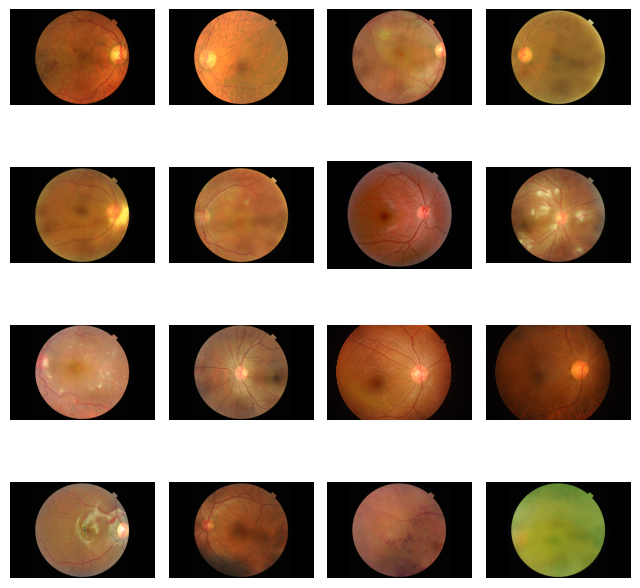

In [ ]:
import matplotlib.pyplot as plt
import cv2
import os

# specify the path to the image directory
img_dir = '/content/sample_data/DLOPs/Training_Set/Training_Set/Training'

# get a list of all the image filenames in the directory
img_filenames = os.listdir(img_dir)

# create a figure with a 4x4 grid of subplots
fig, axs = plt.subplots(4, 4, figsize=(8, 8))
fig.subplots_adjust(hspace=0.1, wspace=0.1)

# loop over the image filenames and plot them in the grid
for i, img_filename in enumerate(img_filenames[:16]):
    # read the image using OpenCV
    img = cv2.imread(os.path.join(img_dir, img_filename))
    # convert the image from BGR to RGB
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # plot the image in the corresponding subplot
    axs[i//4, i%4].imshow(img)
    axs[i//4, i%4].axis('off')

plt.show()

In [ ]:
train_ids = pd.Series(train_ids, name='ids')
train_files = pd.Series(train_files, name='filenames')
train_files = pd.concat([train_ids, train_files], axis=1)

valid_ids = pd.Series(valid_ids, name='ids')
valid_files = pd.Series(valid_files, name='filenames')
valid_files = pd.concat([valid_ids, valid_files], axis=1)

test_ids = pd.Series(test_ids, name='ids')
test_files = pd.Series(test_files, name='filenames')
test_files = pd.concat([test_ids, test_files], axis=1)

In [ ]:
train_files['ids'] = train_files['ids'].astype('int64')
valid_files['ids'] = valid_files['ids'].astype('int64')
test_files['ids'] = test_files['ids'].astype('int64')

In [ ]:
train_df = pd.merge(train_labels, train_files, left_on='ID', right_on='ids')
valid_df = pd.merge(valid_labels, valid_files, left_on='ID', right_on='ids')
test_df = pd.merge(test_labels, test_files, left_on='ID', right_on='ids')
train_df

,ID,Disease_Risk,DR,ARMD,MH,DN,MYA,BRVO,TSLN,ERM,...,CF,VH,MCA,VS,BRAO,PLQ,HPED,CL,ids,filenames
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1.png
1,2,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,2.png
2,3,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,3.png
3,4,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4,4.png
4,5,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,5,5.png
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1915,1916,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1916,1916.png
1916,1917,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1917,1917.png
1917,1918,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1918,1918.png
1918,1919,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1919,1919.png


In [ ]:
train_df.drop(columns='ids')
valid_df.drop(columns='ids')
test_df.drop(columns='ids')

,ID,Disease_Risk,DR,ARMD,MH,DN,MYA,BRVO,TSLN,ERM,...,PTCR,CF,VH,MCA,VS,BRAO,PLQ,HPED,CL,filenames
0,1,1,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1.png
1,2,1,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,2.png
2,3,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3.png
3,4,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.png
4,5,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5.png
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,636,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,636.png
636,637,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,637.png
637,638,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,638.png
638,639,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,639.png


In [ ]:
train_df['full_file_paths'] = '/content/sample_data/DLOPs/Training_Set/Training_Set/Training/' + train_df['filenames']
valid_df['full_file_paths'] = '/content/sample_data/DLOPs/Evaluation_Set/Evaluation_Set/Validation/' + valid_df['filenames']
test_df['full_file_paths'] = '/content/sample_data/DLOPs/Test_Set/Test_Set/Test/' + test_df['filenames']

In [ ]:
class RetinalDisease(torch.utils.data.Dataset):
    def __init__(self, df=train_df, transform=transforms.Compose([transforms.ToTensor()])):
        self.df = df
        self.transform = transform
        
    def __len__(self):
        length = len(self.df)
        return length
        
    def __getitem__(self, idx):
        img_path = self.df.iloc[idx, -1]
        label = torch.tensor(train_df.iloc[idx, 1:-3])
        image = Image.open(img_path).convert('RGB')
        img = np.array(image)
        image = self.transform(image=img)["image"]
        return image, label

In [ ]:
train_transforms = A.Compose([
    A.Resize(1424, 2144),
    A.HorizontalFlip(),
    A.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
    ToTensorV2()
])

test_transforms = A.Compose([
    A.Resize(1424, 2144),
    A.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
    ToTensorV2()
])

In [ ]:
train_dataset = RetinalDisease(transform=train_transforms)
valid_dataset = RetinalDisease(df=valid_df, transform=test_transforms)
test_dataset = RetinalDisease(df=test_df, transform=test_transforms)

In [ ]:
batch_size = 2

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size)
valid_loader = torch.utils.data.DataLoader(valid_dataset, batch_size=batch_size)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=10)

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

#Resnet50

In [ ]:
model = torchvision.models.resnet50(pretrained=True)
model.fc = nn.Sequential(
               nn.Linear(2048, 46))

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:06<00:00, 16.3MB/s]


In [ ]:
optimizer = torch.optim.SGD(model.parameters(), momentum=0.9, weight_decay=0.0005, lr=0.0001)

criterion = nn.BCEWithLogitsLoss(reduction='sum')

lr_scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, factor=0.1, patience=8, cooldown=10, verbose=True)

model = model.to(device)
criterion = criterion.to(device)

In [ ]:
torch.cuda.empty_cache()

In [ ]:
epochs = 15

total_train_loss = []
total_valid_loss = []
best_valid_loss = np.Inf
train_acc = []
valid_acc = []

for epoch in range(epochs): 
    print('Epoch: ', epoch + 1)
    train_loss = []
    valid_loss = []
    train_correct = 0
    train_total = 0
    valid_correct = 0
    valid_total = 0
    for image, target in train_loader:
        model.train()
        image, target = image.to(device), target.to(device)
        output = model(image)
        target = target.float()
        loss = criterion(output, target)
        train_loss.append(loss.item())
        _, predicted = torch.max(output.data, 1)
        train_total += target.size(0)
        #train_correct += (predicted == target).sum().item()
        loss.backward()
        optimizer.step()
        
    for image, target in valid_loader:
        with torch.no_grad():
            model.eval()
            optimizer.zero_grad()
            image, target = image.to(device), target.to(device)
            output = model(image)
            target = target.float()
            loss = criterion(output, target)
            valid_loss.append(loss.item())
            _, predicted = torch.max(output.data, 1)
            valid_total += target.size(0)
            #valid_correct += (predicted == target).sum().item()
            
    epoch_train_loss = np.mean(train_loss)
    epoch_valid_loss = np.mean(valid_loss)
    epoch_train_acc = 100 * train_correct / train_total
    epoch_valid_acc = 100 * valid_correct / valid_total
    print(f'Epoch {epoch + 1}, train loss: {epoch_train_loss:.4f}, valid loss: {epoch_valid_loss:.4f}, train acc: {epoch_train_acc:.2f}%, valid acc: {epoch_valid_acc:.2f}%')
    if epoch_valid_loss < best_valid_loss:
        torch.save(model.state_dict(), 'retinal_disease.pt')
        print('Model improved. Saving model.')
        best_valid_loss = epoch_valid_loss
        
    lr_scheduler.step(epoch_valid_loss)
    total_train_loss.append(epoch_train_loss)
    total_valid_loss.append(epoch_valid_loss)
    train_acc.append(epoch_train_acc)
    valid_acc.append(epoch_valid_acc)

In [ ]:
import pickle
pickle_out = open("emp-model-resnet.pkl","wb")
pickle.dump(model, pickle_out)
pickle_out.close()

# VGG16

In [ ]:
model_vgg = torchvision.models.vgg16(pretrained=True)
model_vgg.fc = nn.Sequential(
               nn.Linear(2048, 46))

In [ ]:
model_vgg.to(device)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [ ]:
optimizer = torch.optim.SGD(model_vgg.parameters(), momentum=0.9, weight_decay=0.0005, lr=0.0001)

criterion = nn.BCEWithLogitsLoss(reduction='sum')

lr_scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, factor=0.1, patience=8, cooldown=10, verbose=True)

model_vgg = model_vgg.to(device)
criterion = criterion.to(device)

In [ ]:
epochs = 15

total_train_loss = []
total_valid_loss = []
best_valid_loss = np.Inf
predicted = []

for epoch in range(epochs): 
    print('Epoch: ', epoch + 1)
    train_loss = []
    valid_loss = []
    train_correct = 0
    train_total = 0
    valid_correct = 0
    valid_total = 0
    for image, target in train_loader:
        model_vgg.train()
        image, target = image.to(device), target.to(device)
        output = model_vgg(image)
        target = target.float()
        loss = criterion(output, target)
        train_loss.append(loss.item())
        loss.backward()
        optimizer.step()
        
    for image, target in valid_loader:
        with torch.no_grad():
            model_vgg.eval()
            optimizer.zero_grad()
            image, target = image.to(device), target.to(device)
            output = model_vgg(image)
            target = target.float()
            loss = criterion(output, target)
            valid_loss.append(loss.item())
            
    epoch_train_loss = np.mean(train_loss)
    epoch_valid_loss = np.mean(valid_loss)
    print(f'Epoch {epoch + 1}, train loss: {epoch_train_loss:.4f}, valid loss: {epoch_valid_loss:.4f}')
    if epoch_valid_loss < best_valid_loss:
        torch.save(model_vgg.state_dict(), 'retinal_disease.pt')
        print('Model improved. Saving model_vgg.')
        best_valid_loss = epoch_valid_loss
        
    lr_scheduler.step(epoch_valid_loss)
    total_train_loss.append(epoch_train_loss)
    total_valid_loss.append(epoch_valid_loss)

In [ ]:
import pickle
pickle_out = open("emp-model-vgg.pkl","wb")
pickle.dump(model_vgg, pickle_out)
pickle_out.close()

# Inception-v3

In [ ]:
model_inception = torchvision.models.inception_v3(pretrained=True)
model_inception.fc = nn.Sequential(
               nn.Linear(2048, 46))

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=Inception_V3_Weights.IMAGENET1K_V1`. You can also use `weights=Inception_V3_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/inception_v3_google-0cc3c7bd.pth" to /root/.cache/torch/hub/checkpoints/inception_v3_google-0cc3c7bd.pth
100%|██████████| 104M/104M [00:06<00:00, 16.2MB/s]


In [ ]:
model_inception.to(device)

Inception3(
  (Conv2d_1a_3x3): BasicConv2d(
    (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2a_3x3): BasicConv2d(
    (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2b_3x3): BasicConv2d(
    (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (Conv2d_3b_1x1): BasicConv2d(
    (conv): Conv2d(64, 80, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(80, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_4a_3x3): BasicConv2d(
    (conv): Conv2d(80, 192, kernel_size=(3, 3), stri

In [ ]:
import pickle
pickle_out = open("emp-model-inception.pkl","wb")
pickle.dump(model_inception, pickle_out)
pickle_out.close()

In [ ]:
epochs = 15

total_train_loss = []
total_valid_loss = []
best_valid_loss = np.Inf
predicted = []

for epoch in range(epochs): 
    print('Epoch: ', epoch + 1)
    train_loss = []
    valid_loss = []
    train_correct = 0
    train_total = 0
    valid_correct = 0
    valid_total = 0
    for image, target in train_loader:
        model_inception.train()
        image, target = image.to(device), target.to(device)
        output = model_inception(image)
        target = target.float()
        loss = criterion(output, target)
        train_loss.append(loss.item())
        loss.backward()
        optimizer.step()
        
    for image, target in valid_loader:
        with torch.no_grad():
            model_inception.eval()
            optimizer.zero_grad()
            image, target = image.to(device), target.to(device)
            output = model_inception(image)
            target = target.float()
            loss = criterion(output, target)
            valid_loss.append(loss.item())
            
    epoch_train_loss = np.mean(train_loss)
    epoch_valid_loss = np.mean(valid_loss)
    print(f'Epoch {epoch + 1}, train loss: {epoch_train_loss:.4f}, valid loss: {epoch_valid_loss:.4f}')
    if epoch_valid_loss < best_valid_loss:
        torch.save(model_inception.state_dict(), 'retinal_disease.pt')
        print('Model improved. Saving model_inception.')
        best_valid_loss = epoch_valid_loss
        
    lr_scheduler.step(epoch_valid_loss)
    total_train_loss.append(epoch_train_loss)
    total_valid_loss.append(epoch_valid_loss)

# Efficientnet

In [ ]:
model_eff = torchvision.models.efficientnet_b0(pretrained=True)
model_eff.fc = nn.Sequential(
               nn.Linear(2048, 46))

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_B0_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_B0_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/efficientnet_b0_rwightman-3dd342df.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b0_rwightman-3dd342df.pth
100%|██████████| 20.5M/20.5M [00:01<00:00, 16.4MB/s]


In [ ]:
model_eff.to(device)

EfficientNet(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): SiLU(inplace=True)
    )
    (1): Sequential(
      (0): MBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
            (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): SiLU(inplace=True)
          )
          (1): SqueezeExcitation(
            (avgpool): AdaptiveAvgPool2d(output_size=1)
            (fc1): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
            (fc2): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
            (activation): SiLU(inplace=True)
            (scale_activation): Sigmoid()
          )
          (2): Conv2dNormActivat

In [ ]:
import pickle
pickle_out = open("emp-model-eff.pkl","wb")
pickle.dump(model_eff, pickle_out)
pickle_out.close()

In [ ]:
epochs = 15

total_train_loss = []
total_valid_loss = []
best_valid_loss = np.Inf
predicted = []

for epoch in range(epochs): 
    print('Epoch: ', epoch + 1)
    train_loss = []
    valid_loss = []
    train_correct = 0
    train_total = 0
    valid_correct = 0
    valid_total = 0
    for image, target in train_loader:
        model_eff.train()
        image, target = image.to(device), target.to(device)
        output = model_eff(image)
        target = target.float()
        loss = criterion(output, target)
        train_loss.append(loss.item())
        loss.backward()
        optimizer.step()
        
    for image, target in valid_loader:
        with torch.no_grad():
            model_eff.eval()
            optimizer.zero_grad()
            image, target = image.to(device), target.to(device)
            output = model_eff(image)
            target = target.float()
            loss = criterion(output, target)
            valid_loss.append(loss.item())
            
    epoch_train_loss = np.mean(train_loss)
    epoch_valid_loss = np.mean(valid_loss)
    print(f'Epoch {epoch + 1}, train loss: {epoch_train_loss:.4f}, valid loss: {epoch_valid_loss:.4f}')
    if epoch_valid_loss < best_valid_loss:
        torch.save(model_eff.state_dict(), 'retinal_disease.pt')
        print('Model improved. Saving model_eff.')
        best_valid_loss = epoch_valid_loss
        
    lr_scheduler.step(epoch_valid_loss)
    total_train_loss.append(epoch_train_loss)
    total_valid_loss.append(epoch_valid_loss)

# Densenet

In [ ]:
model_dense = torchvision.models.densenet121(pretrained=True)
model_dense.fc = nn.Sequential(
               nn.Linear(2048, 46))

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet121_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet121_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/densenet121-a639ec97.pth" to /root/.cache/torch/hub/checkpoints/densenet121-a639ec97.pth
100%|██████████| 30.8M/30.8M [00:01<00:00, 16.4MB/s]


In [ ]:
model_dense.to(device)

DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace=True)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu

In [ ]:
import pickle
pickle_out = open("emp-model-dense.pkl","wb")
pickle.dump(model_dense, pickle_out)
pickle_out.close()

In [ ]:
epochs = 15

total_train_loss = []
total_valid_loss = []
best_valid_loss = np.Inf
predicted = []

for epoch in range(epochs): 
    print('Epoch: ', epoch + 1)
    train_loss = []
    valid_loss = []
    train_correct = 0
    train_total = 0
    valid_correct = 0
    valid_total = 0
    for image, target in train_loader:
        model_dense.train()
        image, target = image.to(device), target.to(device)
        output = model_dense(image)
        target = target.float()
        loss = criterion(output, target)
        train_loss.append(loss.item())
        loss.backward()
        optimizer.step()
        
    for image, target in valid_loader:
        with torch.no_grad():
            model_dense.eval()
            optimizer.zero_grad()
            image, target = image.to(device), target.to(device)
            output = model_dense(image)
            target = target.float()
            loss = criterion(output, target)
            valid_loss.append(loss.item())
            
    epoch_train_loss = np.mean(train_loss)
    epoch_valid_loss = np.mean(valid_loss)
    print(f'Epoch {epoch + 1}, train loss: {epoch_train_loss:.4f}, valid loss: {epoch_valid_loss:.4f}')
    if epoch_valid_loss < best_valid_loss:
        torch.save(model_dense.state_dict(), 'retinal_disease.pt')
        print('Model improved. Saving model_dense.')
        best_valid_loss = epoch_valid_loss
        
    lr_scheduler.step(epoch_valid_loss)
    total_train_loss.append(epoch_train_loss)
    total_valid_loss.append(epoch_valid_loss)

# Ensemble

In [ ]:
classifier = nn.Linear(2048, 46)

# Define the ensemble model that combines the pre-trained models and the final layer
class EnsembleModel(nn.Module):
    def __init__(self, resnet, vgg, inception, efficientnet, densenet, classifier):
        super(EnsembleModel, self).__init__()
        self.resnet = nn.Sequential(*list(resnet.children())[:-1])
        self.vgg = nn.Sequential(*list(vgg.children())[:-1])
        self.inception = nn.Sequential(*list(inception.children())[:-1])
        self.efficientnet = efficientnet
        self.densenet = nn.Sequential(*list(densenet.children())[:-1])
        self.classifier = classifier
        
    def forward(self, x):
        x1 = self.resnet(x)
        x1 = x1.view(x1.size(0), -1)
        x2 = self.vgg(x)
        x2 = x2.view(x2.size(0), -1)
        x3 = self.inception(x)
        x3 = x3.view(x3.size(0), -1)
        x4 = self.efficientnet(x)
        x4 = x4.view(x4.size(0), -1)
        x5 = self.densenet(x)
        x5 = x5.view(x5.size(0), -1)
        x = torch.cat((x1, x2, x3, x4, x5), dim=1)
        x = self.classifier(x)
        return x

# Create an instance of the ensemble model
ensemble_model = EnsembleModel(model, model_vgg, model_inception, model_eff, model_dense, classifier)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(ensemble_model.parameters(), lr=0.001)

In [ ]:
import pickle
pickle_out = open("emp-model-ensemble.pkl","wb")
pickle.dump(ensemble_model, pickle_out)
pickle_out.close()

In [ ]:
ensemble_model

EnsembleModel(
  (resnet): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
          (0): Conv2d

In [ ]:
num_epochs = 15

for epoch in range(num_epochs):
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        
        optimizer.zero_grad()
        
        outputs = ensemble_model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        
        if i % 100 == 99:
            print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / 100))
            running_loss = 0.0

# Evaluate the ensemble model on the validation set
correct = 0
total = 0

with torch.no_grad():
    for data in valid_loader:
        images, labels = data
        
        outputs = ensemble_model(images)
        _, predicted = torch.max(outputs.data, 1)
        
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the ensemble model on the %d validation images: %d %%' % (total, 100 * correct / total))